In [74]:
import pandas as pd
import sklearn
from category_encoders import *
import missingno
import seaborn as sns

# Análisis exploratorio

Vamos analizar, la table master. Pero puede ver más información si tenemos los montos y los tokens de las transacciones

In [123]:
master = pd.read_excel("Master.xlsx",index_col=0)
trx = pd.read_csv("data/Trx.csv")
towns = pd.read_csv("data/Towns.csv").to_dict()
master.head()

,id_trx,first_name,last_name,email,gender,Town,is_claim
0,6.0,Keely,Goodby,kgoodby0@hibu.com,Female,4,False
1,37.0,Keely,Goodby,kgoodby0@hibu.com,Female,4,False
2,60.0,Keely,Goodby,kgoodby0@hibu.com,Female,4,False
3,73.0,Keely,Goodby,kgoodby0@hibu.com,Female,4,False
4,100.0,Keely,Goodby,kgoodby0@hibu.com,Female,4,False


Está son las 10 primeras columnas de la table master

In [4]:
trx.head()

,id_trx,id_user,token_id,value,trx_city,ip_address
0,1,4980670d-6432-4d61-a180-7a77190d39a0,NaN,1900000,Valledupar,30.67.95.63
1,2,9c72d701-aa11-482b-98fc-e91d7e6133e1,NaN,9500000,Barranquilla,61.226.40.175
2,3,5f7bc087-6b7e-4f4a-bab7-2c85f94c5a24,NaN,4300000,Bogota,NaN
3,4,65e4023c-acee-4d74-a0c9-c6ec1d7f4c1d,NaN,5300000,Sincelejo,24.208.231.123
4,5,65e4023c-acee-4d74-a0c9-c6ec1d7f4c1d,NaN,8000000,Medellin,252.132.79.7


Está son las 10 columnas de la base de datos transacciones

In [58]:
merge_trx_user = master.merge(trx)
merge_trx_user.head()

,id_trx,first_name,last_name,email,gender,Town,is_claim,id_user,token_id,value,trx_city,ip_address
0,6.0,Keely,Goodby,kgoodby0@hibu.com,Female,4,False,7e627f33-85f1-4861-9949-3347b365e299,bgAAAAABjSEM4AYNkSTDVPm9dMYKn53ZFRuT44ALaUxws...,3400000,Cartagena,162.226.37.246
1,37.0,Keely,Goodby,kgoodby0@hibu.com,Female,4,False,7e627f33-85f1-4861-9949-3347b365e299,NaN,3600000,Armenia,27.142.249.12
2,60.0,Keely,Goodby,kgoodby0@hibu.com,Female,4,False,7e627f33-85f1-4861-9949-3347b365e299,NaN,6700000,Sincelejo,NaN
3,73.0,Keely,Goodby,kgoodby0@hibu.com,Female,4,False,7e627f33-85f1-4861-9949-3347b365e299,NaN,9700000,Armenia,NaN
4,100.0,Keely,Goodby,kgoodby0@hibu.com,Female,4,False,7e627f33-85f1-4861-9949-3347b365e299,NaN,1900000,Pasto,232.100.18.233


In [127]:
towns["Town"]

{0: 'Bogota',
 1: 'Cali',
 2: 'Medellin',
 3: 'Barranquilla',
 4: 'Cartagena',
 5: 'Santa Marta',
 6: 'Valledupar',
 7: 'Pasto',
 8: 'Sincelejo',
 9: 'Armenia'}

In [131]:
merge_trx_user["Town"] = merge_trx_user["Town"].apply(lambda x: towns["Town"][x])

In [132]:
merge_trx_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_trx              1000 non-null   float64
 1   first_name          1000 non-null   object 
 2   last_name           1000 non-null   object 
 3   email               1000 non-null   object 
 4   gender              1000 non-null   object 
 5   Town                1000 non-null   object 
 6   is_claim            1000 non-null   bool   
 7   id_user             1000 non-null   object 
 8   token_id            220 non-null    object 
 9   value               1000 non-null   int64  
 10  trx_city            1000 non-null   object 
 11  ip_address          705 non-null    object 
 12  ip_address_is_null  1000 non-null   bool   
 13  token_id_is_null    1000 non-null   bool   
 14  full_name           1000 non-null   object 
dtypes: bool(3), float64(1), int64(1), object(10)
memory usag

In [133]:
merge_trx_user["full_name"] = merge_trx_user.apply(lambda x: x.first_name+ " " + x.last_name, axis=1)

Esta es la tabla resultado, donde ya se hizo el respectivo merge

<AxesSubplot: title={'center': 'Distribución del valor de las transacciones'}, ylabel='Density'>

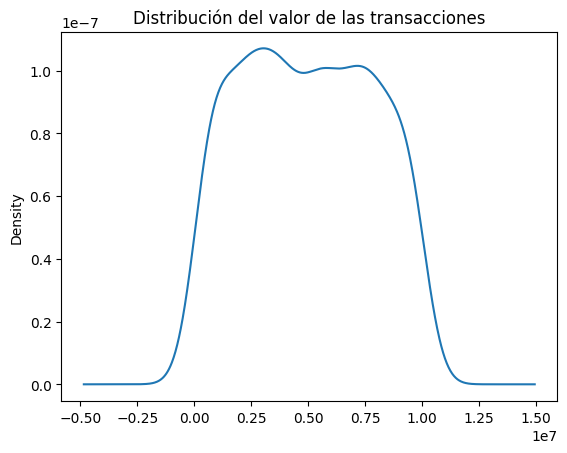

In [134]:
merge_trx_user["value"].astype(float).plot.density(title="Distribución del valor de las transacciones")

Está es la distribución de las transacciones

<AxesSubplot: >

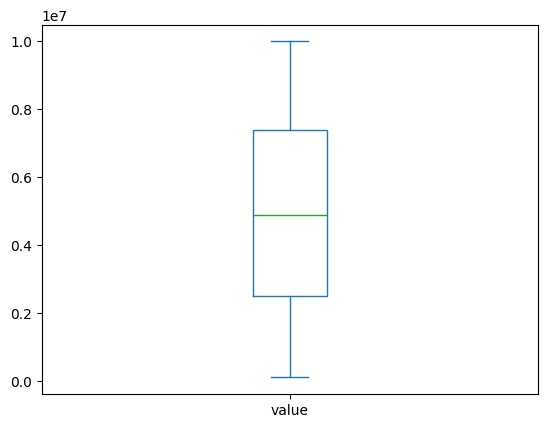

In [135]:
merge_trx_user["value"].plot.box()

In [136]:
merge_trx_user.describe()["value"]

count    1.000000e+03
mean     4.962900e+06
std      2.849831e+06
min      1.000000e+05
25%      2.500000e+06
50%      4.900000e+06
75%      7.400000e+06
max      1.000000e+07
Name: value, dtype: float64

En general, las transacciones, no tienen valores atipicos. Todo se ve bien

<AxesSubplot: >

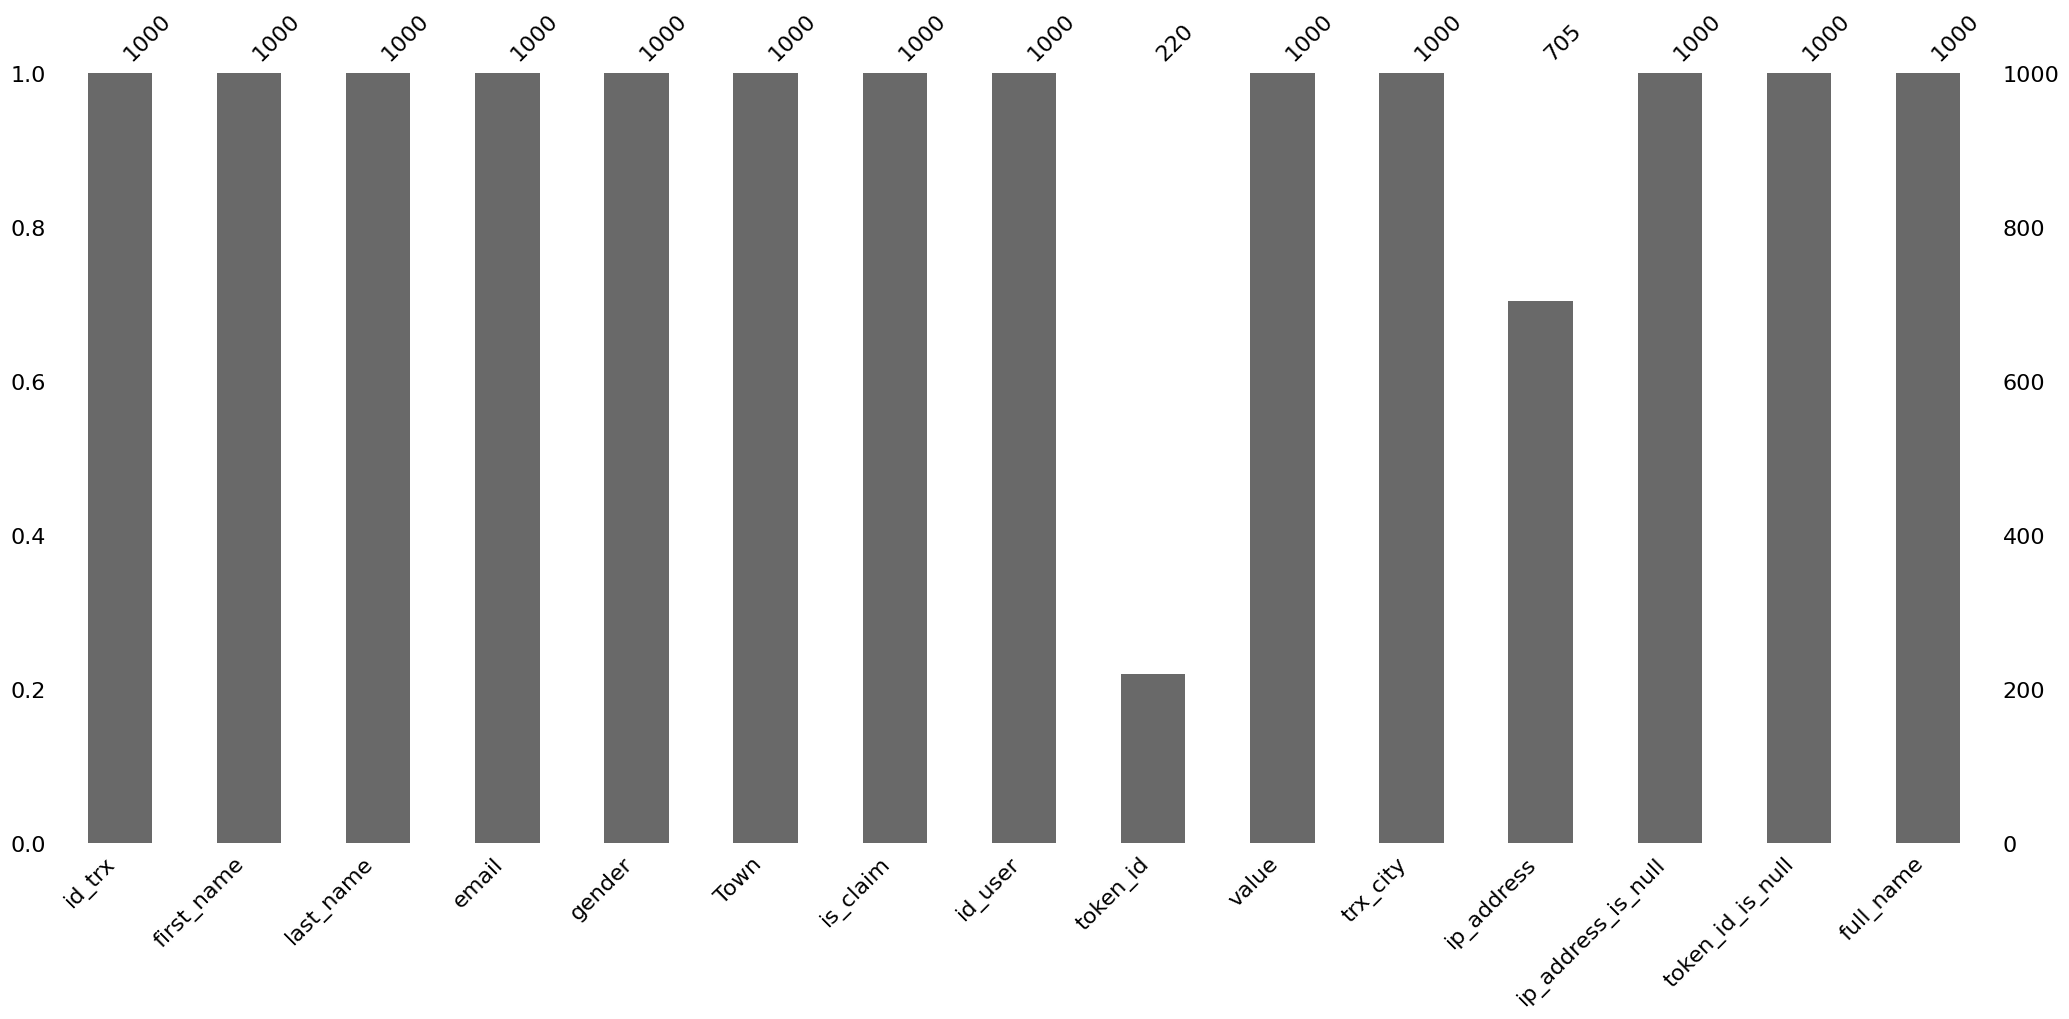

In [137]:
missingno.bar(merge_trx_user)

Aquí vemos en total cuantos valores nulos se tienen

<AxesSubplot: >

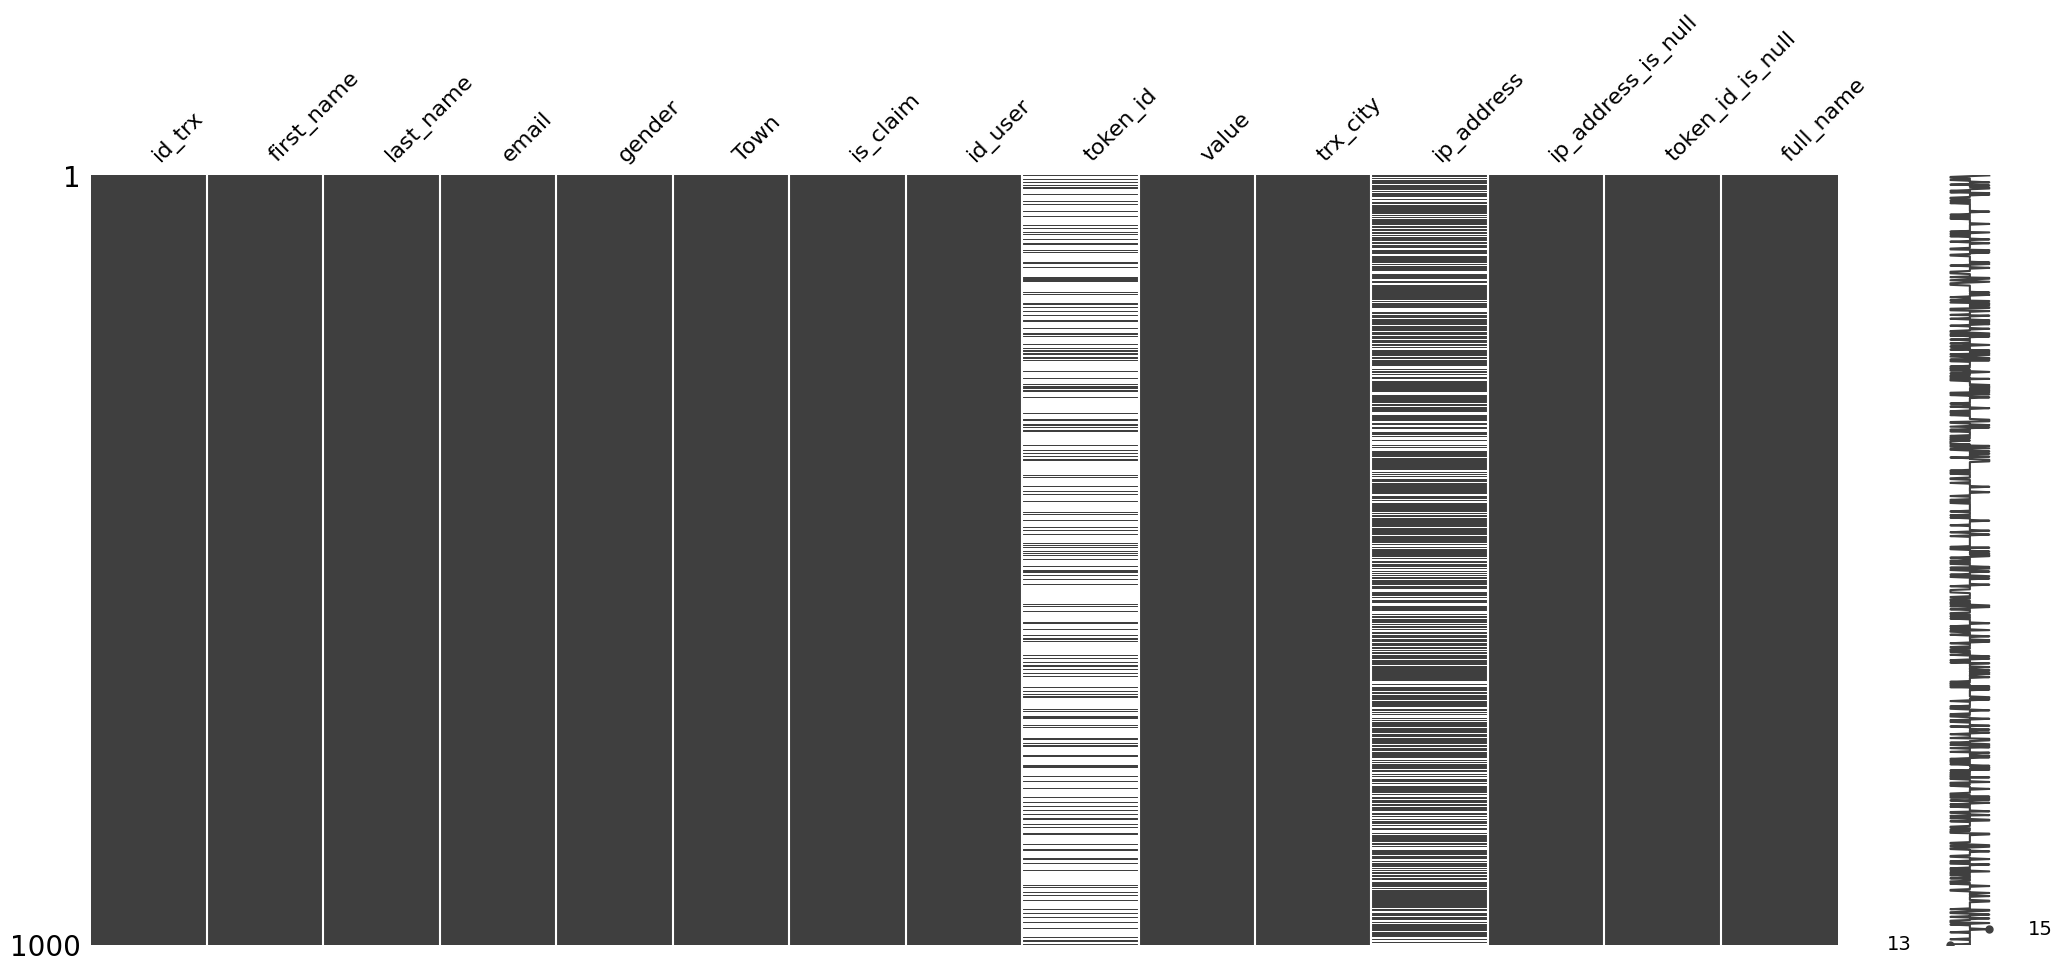

In [138]:
missingno.matrix(merge_trx_user)

Aquí vemos los valores nulos por fila. Sería interesante ver que usuario se tienen mayor valores nulos ip_address

In [139]:
merge_trx_user["ip_address_is_null"] = merge_trx_user.ip_address.isnull()
merge_trx_user["token_id_is_null"] = merge_trx_user.token_id.isnull()

En el gráfico anterior podemos ver en que filas están los valores nulos

<AxesSubplot: title={'center': 'Cantidad de transacciones por usuario'}, xlabel='full_name'>

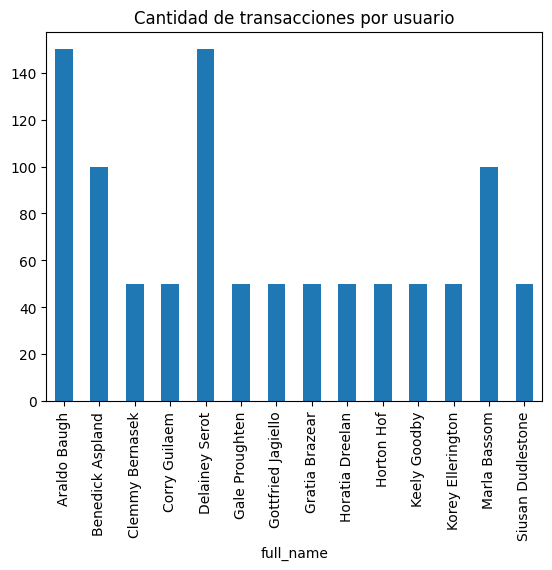

In [140]:
merge_trx_user.groupby("full_name").size().plot.bar(title="Cantidad de transacciones por usuario")

Podemos ver el total de veces que se han hecho transacciones.

<AxesSubplot: title={'center': 'Cantidad de transacciones por usuario'}, xlabel='full_name'>

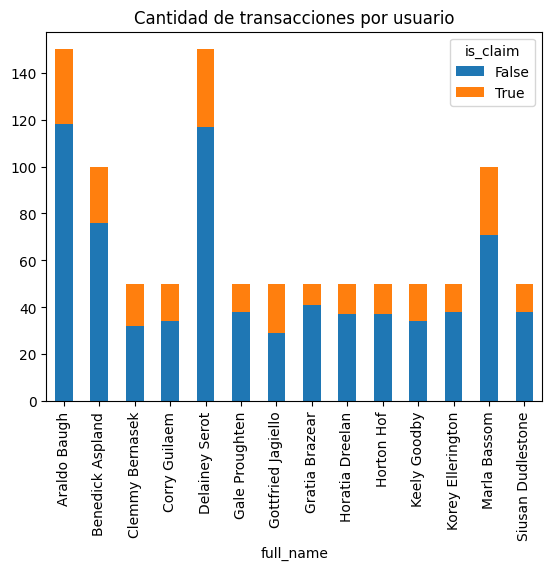

In [141]:
plot_df = merge_trx_user.groupby(["full_name","is_claim"]).size().unstack("is_claim").fillna(0)
plot_df.plot(kind="bar", stacked=True, title="Cantidad de transacciones por usuario")

Lo que vemos es la cantidad de transacciones, de esas cuales fueron reclamdas

<AxesSubplot: title={'center': 'Cantidad de transacciones por usuario'}, xlabel='full_name'>

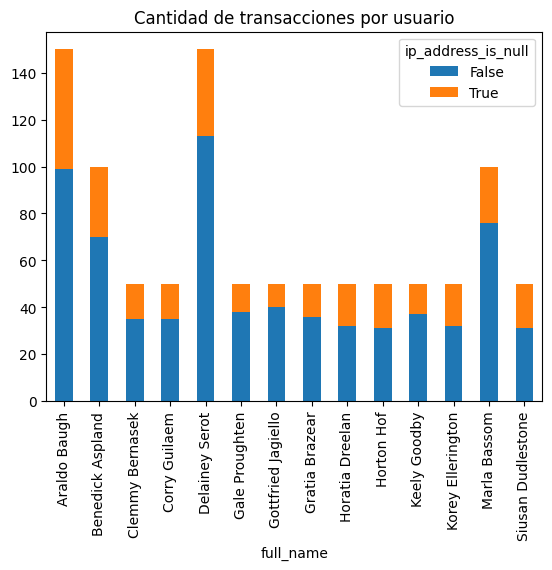

In [142]:
plot_df = merge_trx_user.groupby(["full_name","ip_address_is_null"]).size().unstack("ip_address_is_null").fillna(0)
plot_df.plot(kind="bar", stacked=True, title="Cantidad de transacciones por usuario")

Muchos de los usarios, hacen muchas transacciones desde internet

<AxesSubplot: title={'center': 'Cantidad de transacciones por usuario'}, xlabel='full_name'>

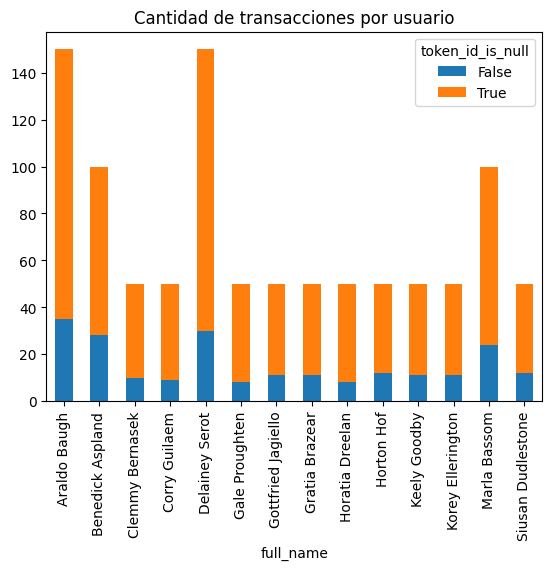

In [143]:
plot_df = merge_trx_user.groupby(["full_name","token_id_is_null"]).size().unstack("token_id_is_null").fillna(0)
plot_df.plot(kind="bar", stacked=True, title="Cantidad de transacciones por usuario")

Aquí vemos que hay muchas transacciones que tienen valores nulos

<AxesSubplot: title={'center': 'Cantidad vs Genero'}, xlabel='gender'>

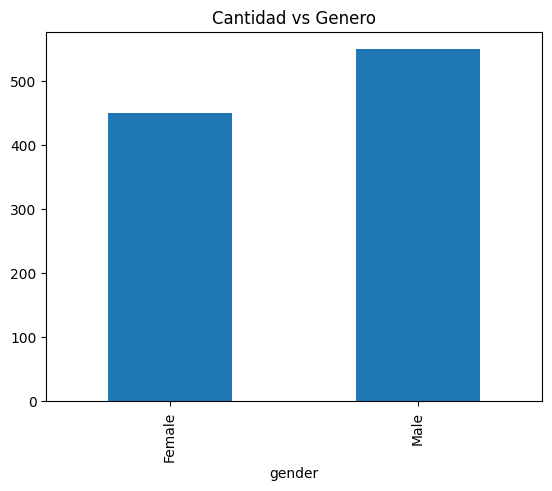

In [144]:
merge_trx_user.groupby("gender").size().plot.bar(title="Cantidad vs Genero")

<AxesSubplot: title={'center': 'Cantidad de transacciones por genero'}, xlabel='gender'>

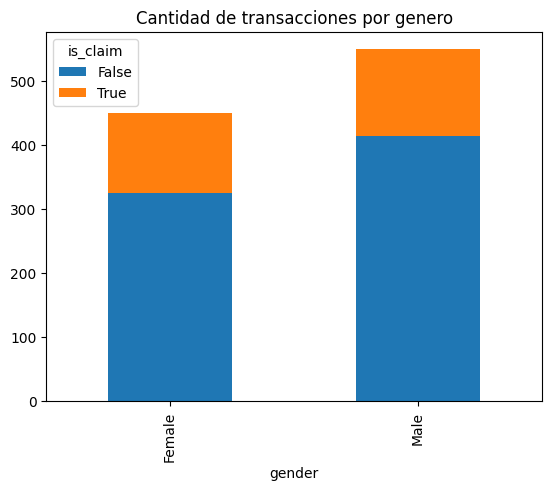

In [145]:
plot_df = merge_trx_user.groupby(["gender","is_claim"]).size().unstack("is_claim").fillna(0)
plot_df.plot(kind="bar", stacked=True, title="Cantidad de transacciones por genero")

<AxesSubplot: title={'center': 'Cantidad de transacciones por genero'}, xlabel='Town'>

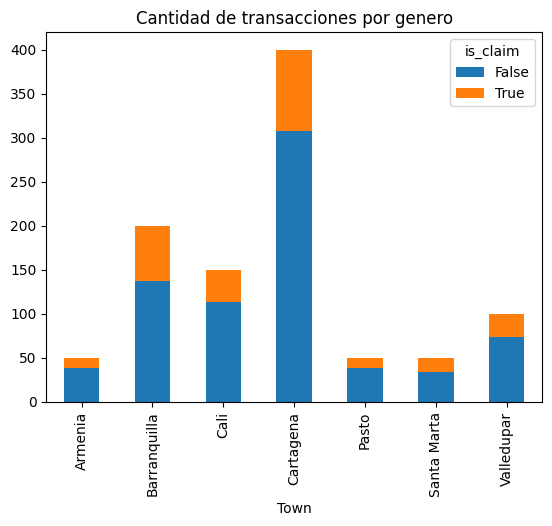

In [146]:
plot_df = merge_trx_user.groupby(["Town","is_claim"]).size().unstack("is_claim").fillna(0)
plot_df.plot(kind="bar", stacked=True, title="Cantidad de transacciones por genero")

La ciudad con mayor transacciones, es la 4 que sería Cartagena y tambien la que más reclamos tiene

<AxesSubplot: xlabel='is_claim', ylabel='value'>

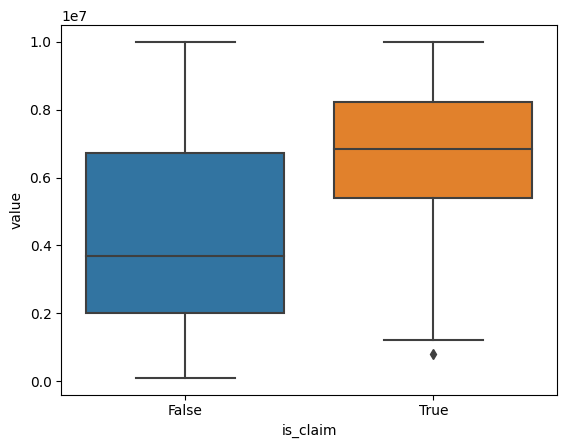

In [147]:
df_plot = merge_trx_user[["is_claim", "value"]]
sns.boxplot(data=df_plot, y="value", x="is_claim")

En está gráfica vemos, que los reclamos tiende a ser a montos grandes.

<AxesSubplot: xlabel='ip_address_is_null', ylabel='value'>

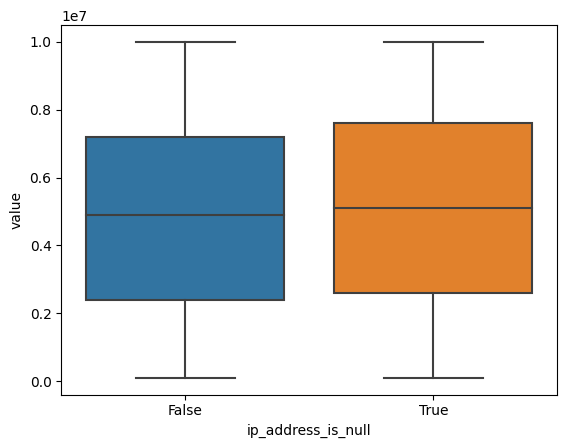

In [148]:
df_plot = merge_trx_user[["value", "ip_address_is_null"]]
sns.boxplot(data=df_plot, y="value", x="ip_address_is_null")

En la gráfica vemos que las transacciones hecha por internet es muy similar a las no hechas por internet (Tocaría hacer uns hipotesis)

<AxesSubplot: xlabel='token_id_is_null', ylabel='value'>

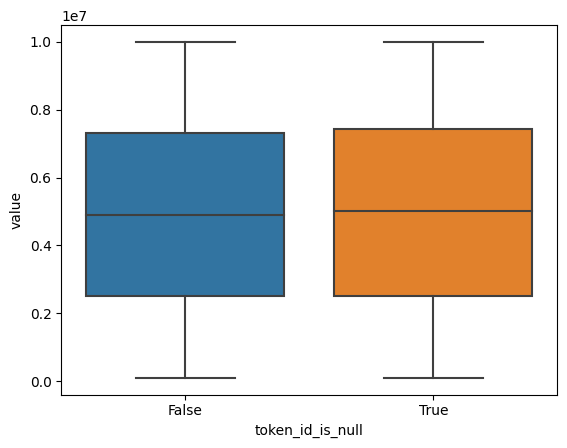

In [157]:
df_plot = merge_trx_user[["value", "token_id_is_null"]]
sns.boxplot(data=df_plot, y="value", x="token_id_is_null")

Aquí el token id está registrado en menos transacciones, pero tiene la misma media (Hacer prueba de hipostesís)

<AxesSubplot: xlabel='Town', ylabel='value'>

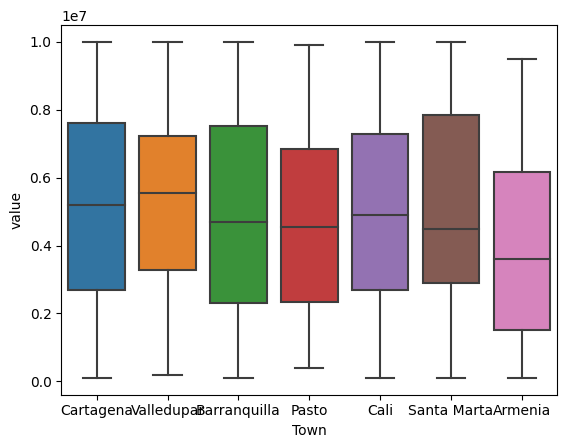

In [149]:
df_plot = merge_trx_user[["Town", "value"]]
sns.boxplot(data=df_plot, y="value", x="Town")

Aqui vemos los montos y el pueblos de origen de los usuarios

<AxesSubplot: xlabel='trx_city', ylabel='value'>

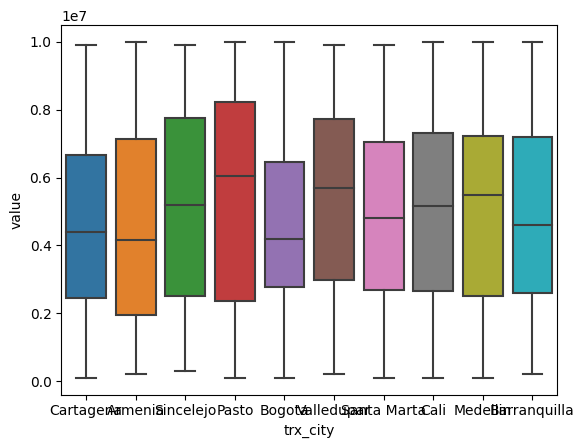

In [150]:
df_plot = merge_trx_user[["trx_city", "value"]]
sns.boxplot(data=df_plot, y="value", x="trx_city")

Aquí Vemos las transacciones y el lugar donde se hizo la transacción

<AxesSubplot: title={'center': 'Ciudades que se hicieron las transacciones'}, xlabel='trx_city'>

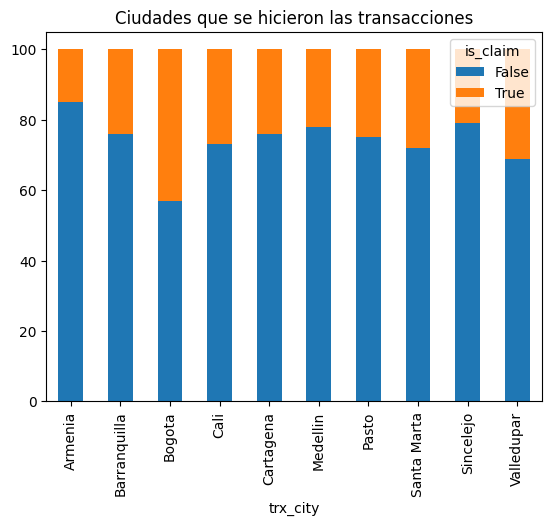

In [117]:
plot_df = merge_trx_user.groupby(["trx_city","is_claim"]).size().unstack("is_claim").fillna(0)
plot_df.plot(kind="bar", stacked=True, title="Ciudades que se hicieron las transacciones")

La ciudad con la que hace más reclamos es la ciudad de bogotá

<AxesSubplot: title={'center': 'Transacciones hechas por internet desde cada ciudad'}, xlabel='trx_city'>

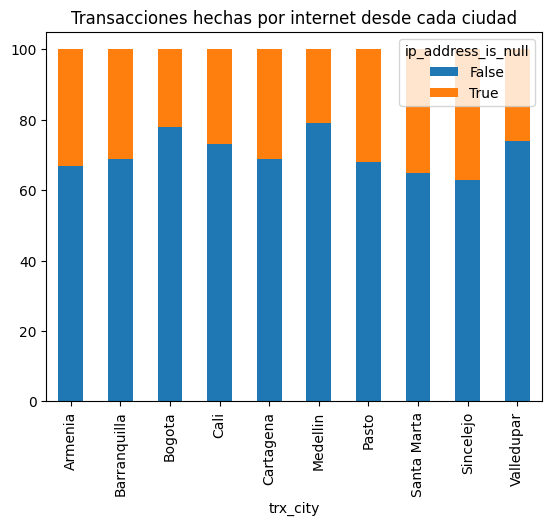

In [119]:
plot_df = merge_trx_user.groupby(["trx_city","ip_address_is_null"]).size().unstack("ip_address_is_null").fillna(0)
plot_df.plot(kind="bar", stacked=True, title="Transacciones hechas por internet desde cada ciudad")

<AxesSubplot: title={'center': 'Ciudades de origen de las personas y hechas por internet'}, xlabel='Town'>

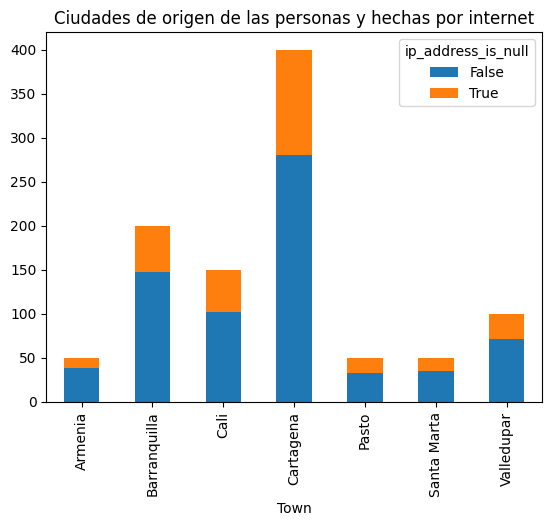

In [154]:
plot_df = merge_trx_user.groupby(["Town","ip_address_is_null"]).size().unstack("ip_address_is_null").fillna(0)
plot_df.plot(kind="bar", stacked=True, title="Ciudades de origen de las personas y hechas por internet")

<AxesSubplot: title={'center': 'Ciudades de origen de las personas y hechas por internet'}, xlabel='Town'>

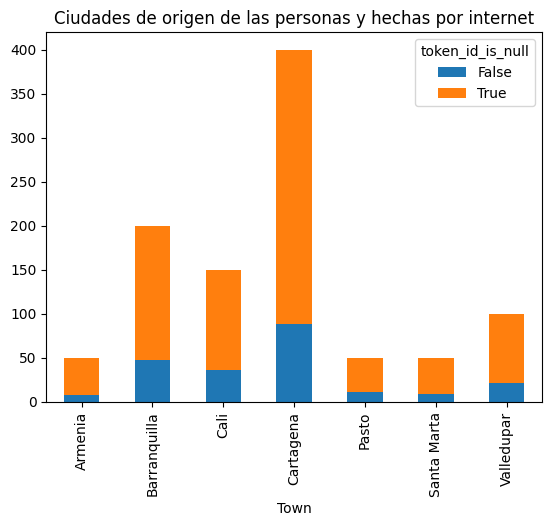

In [155]:
plot_df = merge_trx_user.groupby(["Town","token_id_is_null"]).size().unstack("token_id_is_null").fillna(0)
plot_df.plot(kind="bar", stacked=True, title="Ciudades de origen de las personas y hechas por internet")

## Correlación

In [158]:
import association_metrics as am
def cramer_corr(dataset):
    dataset = dataset.apply(
        lambda x: x.astype("category") if x.dtype == "O" else x
        )
    cramersv = am.CramersV(dataset) 
    sns.heatmap(cramersv.fit(), annot = True)

In [195]:
categorical = ["token_id_is_null", "ip_address_is_null", "full_name", "trx_city", "is_claim"]
for cat in categorical:
    merge_trx_user[cat] = pd.Categorical(merge_trx_user[cat] )

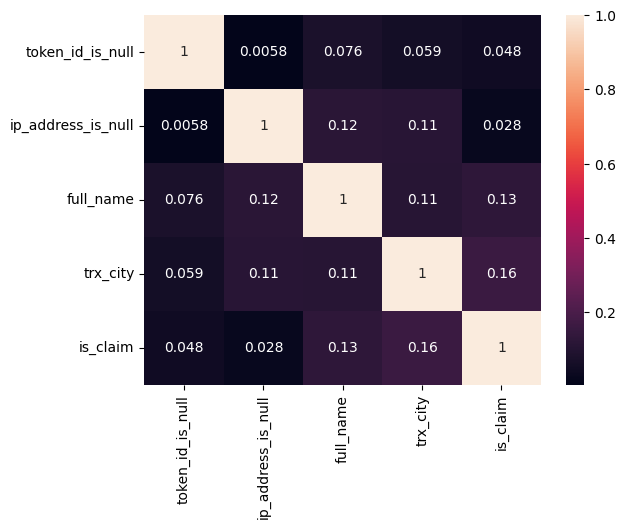

In [196]:
cramer_corr(merge_trx_user[categorical])

Por la correlación de cramer, no hay ninguna correlación alta.

# Modelo propuestos

Se Creará un modelo, para saber si una transacción será reclamada o no

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler, OneHotEncoder

selct_variable = categorical.copy()
selct_variable.append("value")
y = merge_trx_user.is_claim.astype(int)
X = merge_trx_user[selct_variable]


x_train, x_test, y_train, y_test  =train_test_split(X, y,test_size=0.2, random_state=42,stratify=y )

In [228]:
weigth = x_train.shape[0] / (2 * np.bincount(y_train))

In [199]:
from sklearn.pipeline import make_pipeline

categorical_pipe = make_pipeline(OneHotEncoder())
numerical_pipe = make_pipeline(StandardScaler())


In [206]:
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
import numpy as np

transform = make_column_transformer(
    (categorical_pipe, make_column_selector(dtype_include=object)),
    (numerical_pipe, make_column_selector(dtype_include=np.number))
)

Train Data
              precision    recall  f1-score   support

           0       0.86      0.66      0.75       592
           1       0.42      0.70      0.53       208

    accuracy                           0.67       800
   macro avg       0.64      0.68      0.64       800
weighted avg       0.75      0.67      0.69       800

------------
Test Data
              precision    recall  f1-score   support

           0       0.89      0.64      0.75       148
           1       0.43      0.77      0.55        52

    accuracy                           0.68       200
   macro avg       0.66      0.71      0.65       200
weighted avg       0.77      0.68      0.69       200



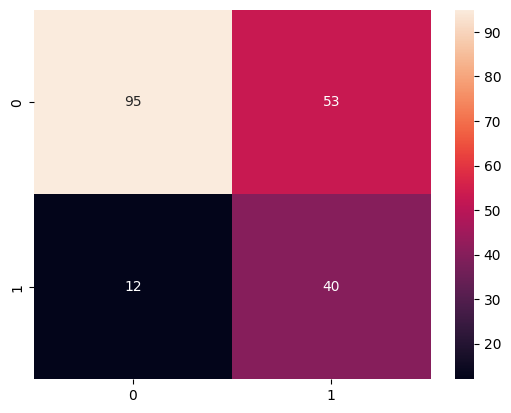

In [251]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score
from matplotlib import pyplot as plt 

lr = make_pipeline(
    transform,
    LogisticRegression(class_weight="balanced")
)

def plot_metrics(y, pred):
    print(classification_report(y, pred))

    
    
def train_model(model,x_train,y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    print("Train Data")
    plot_metrics(y_train, y_train_pred)
    print("------------")
    print("Test Data")
    y_test_pred = model.predict(x_test)
    print(classification_report(y_test,y_test_pred))
    cm = confusion_matrix(y_test,y_test_pred)
    sns.heatmap(cm, annot = True)
    plt.show()
    return y_test, y_test_pred

y_test_lg, y_test_pred_lg = train_model(lr, x_train, y_train, x_test, y_test)



Esté modelo, logra diferenciar entre los FP y FN (Tiene un f1 = 0.65). El modelo es simple y facil de entender. Se pueden ver las caracteristicas que más influencías tienen. El modelo es muy bueno para identificar los FN, algo muy importante, dado que la idea es prever esté problema

Train Data
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       592
           1       0.59      0.32      0.41       208

    accuracy                           0.77       800
   macro avg       0.69      0.62      0.63       800
weighted avg       0.74      0.77      0.74       800

------------
Test Data
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       148
           1       0.39      0.13      0.20        52

    accuracy                           0.72       200
   macro avg       0.57      0.53      0.52       200
weighted avg       0.66      0.72      0.67       200



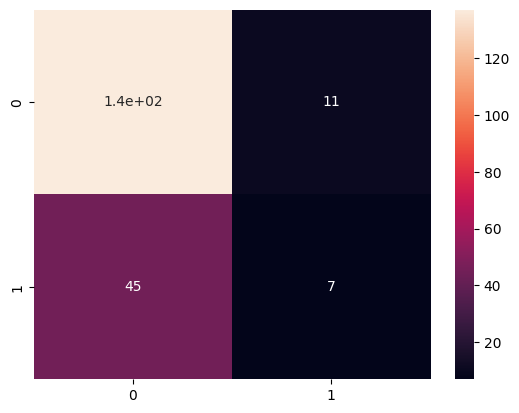

In [252]:
kn = make_pipeline(
    transform,
    KNeighborsClassifier()
)
y_test_kn, y_test_pred_kn = train_model(kn, x_train, y_train, x_test, y_test)

El modelo, es muy bueno para detectar la clase 0 (los que no hicieron reclamos) pero tienen mucho problemas para identificar y pueden a ver muchos falsos positivos

Train Data
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       592
           1       0.61      0.44      0.51       208

    accuracy                           0.78       800
   macro avg       0.72      0.67      0.69       800
weighted avg       0.77      0.78      0.77       800

------------
Test Data
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       148
           1       0.50      0.31      0.38        52

    accuracy                           0.74       200
   macro avg       0.64      0.60      0.61       200
weighted avg       0.71      0.74      0.72       200



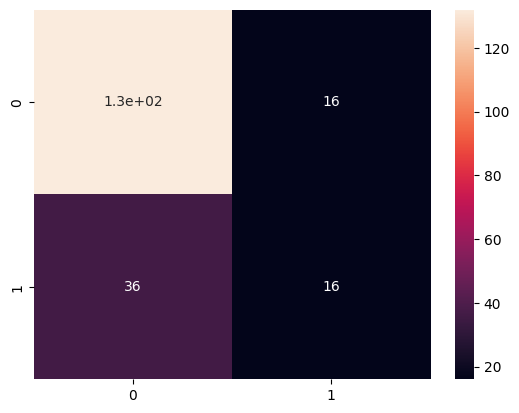

In [259]:
xg = make_pipeline(
    transform,
    XGBClassifier(objective="binary:logistic")
)
y_test_xg, y_test_pred_xg = train_model(xg, x_train, y_train, x_test, y_test)

El modelo separa bien los FP. Aunque con FB es el mejor de los tres, lo que le da una ventaja.

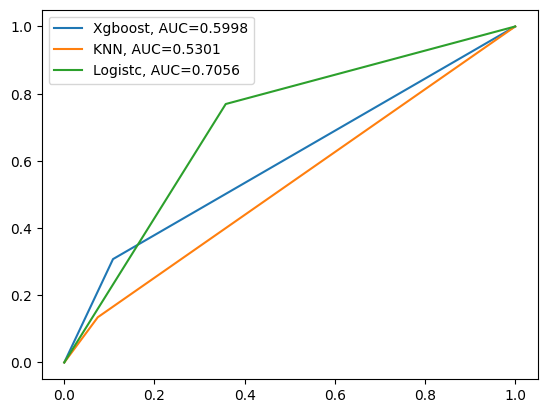

In [260]:
values = [(y_test_xg, y_test_pred_xg,"Xgboost"), (y_test_kn, y_test_pred_kn , "KNN"), (y_test_lg, y_test_pred_lg, "Logistc")]
for y_test,y_test_pred, title in values :
    fpr, tpr, _ = roc_curve(y_test, y_test_pred)
    auc = round(roc_auc_score(y_test, y_test_pred), 4)
    plt.plot(fpr,tpr,label=f"{title}, AUC="+str(auc))
plt.legend()

## Conclusiones

1. El mejor modelo, para saber si el usuario va a presentar una queja es el de Logistic con AUC = 0.7056
2. Los registros que se tiene, cuando se hace reclamos es a montos grandes
3. La mayoría de las transacciones se hacen son IP, eso quiere decir que no se hicieron desde la aplicación. Así que la mayoría delas transacciones se hacen desde internet.
4. No nos podemos confiar del Accuracy dado que se tiene un desvalance de datos.
5. Otra métrica muy importante es el f1-scores (Que combiana recall y presicion) en este caso el mejor modelo es Xgboost
6. Se utilizaron estos modelos, dado que son tres familias diferentes, y se quiere ver con cual familiar lo hace mejor


## En el futuro:
Si agregamos la hora, fecha y diía que se hace la transacción, se puede ver los días que se hacen los alertas y puede mejorar el modelo. Dado que nos da más información y se puede hacer más con el feature engeenier.

Importante crear un perfil del usuario, para encontrar usuarios influenciadores y las conexiones entre los otros.